In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

random.seed(1)

a1 = np.array([2,2])
a2 = np.array([3,-3])

def sigmoid(theta, x):
    return 1. / (1 + math.e**(-np.array(x).dot(theta)))

In [4]:
Z = np.random.normal(0, 1, 1000)
X_train = np.array(np.matrix([np.random.normal(0, 1, 1000), np.random.normal(0, 1, 1000)]).T)
X_test = np.array(np.matrix([np.random.normal(0, 1, 1000), np.random.normal(0, 1, 1000)]).T)
Y_train = np.array([sigmoid(a1, x) for x in X_train]) + np.array([a2.dot(np.array(x).T)**2 for x in X_train]) + 0.3*Z
Y_test = np.array([sigmoid(a1, x) for x in X_test]) + np.array([a2.dot(np.array(x).T)**2 for x in X_test]) + 0.3*Z

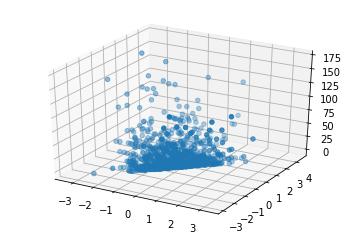

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1],  Y_train)
plt.show()

In [8]:
from sklearn.neural_network import MLPRegressor

train_error=[]
test_error=[]

# one hidden layer with 2~10 nodes
for i in range(2,11):
    reg = MLPRegressor(hidden_layer_sizes=i, solver='lbfgs')
    model = reg.fit(X_train,Y_train) # Train the network
    MSE_train = np.mean((Y_train - model.predict(X_train))**2)
    MSE_test = np.mean((Y_test - model.predict(X_test))**2)
    train_error.append(MSE_train)
    test_error.append(MSE_test)
print(MSE_train, MSE_test)

1.1227448329000167 2.6216711971245883


In [9]:
train_error

[15.040320480493335,
 7.918030602678431,
 2.1561133928679146,
 1.340438605216651,
 0.678970533808506,
 7.0741692547443975,
 1.3323501396027086,
 0.6665539755180059,
 1.1227448329000167]

In [11]:
np.array(range(2,11))
train_error

[15.040320480493335,
 7.918030602678431,
 2.1561133928679146,
 1.340438605216651,
 0.678970533808506,
 7.0741692547443975,
 1.3323501396027086,
 0.6665539755180059,
 1.1227448329000167]

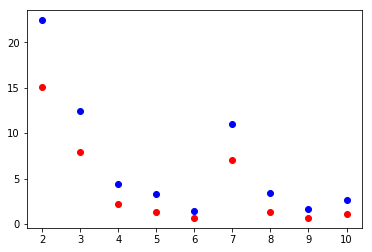

Minimum number of hdden nodes needed to perform well is 6


In [12]:
fig = plt.figure()
plt.plot(np.array(range(2,11)), train_error, 'ro', label = 'train error')
plt.plot(np.array(range(2,11)),test_error, 'bo', label = 'test error')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

for i in range(len(test_error)-1):
    if test_error[i] < test_error[i+1]: optimal_node=i+2; break

print("Minimum number of hdden nodes needed to perform well is", optimal_node)